In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import condastats.cli

From `condastats overall awkward --monthly`:

```
awkward   2019-01       69
          2019-02      486
          2019-03      762
          2019-04      422
          2019-05      785
          2019-06     1033
          2019-07      927
          2019-08      572
          2019-09      652
          2019-10     1467
          2019-11      825
          2019-12     1239
          2020-01     1099
          2020-02     1179
          2020-03      840
          2020-04      863
          2020-05     1104
          2020-06     1281
          2020-07     1651
          2020-08     1862
          2020-09     1941
          2020-10     1498
          2020-11     1545
          2020-12     3056
          2021-01     4540
          2021-02     6046
          2021-03     9669
          2021-04    14236
          2021-05    10343
          2021-06    14533
          2021-07     9424
          2021-08    13832
          2021-09    12802
          2021-10    14762
          2021-11    10645
          2021-12     9543
          2022-01     7901
          2022-02     8092
          2022-03    12806
          2022-04    18959
          2022-05    14934
          2022-06    18215
          2022-07     6774
          2022-08     8177
          2022-09    10976
          2022-10    10897
          2022-11    15587
          2022-12     8610
          2023-01     7158
          2023-02     7647
          2023-03     6105
          2023-04     6753
          2023-05     5257
          2023-06     4397
          2023-07     4955
```

In [2]:
conda_df = condastats.cli.pkg_platform("awkward", monthly=True)

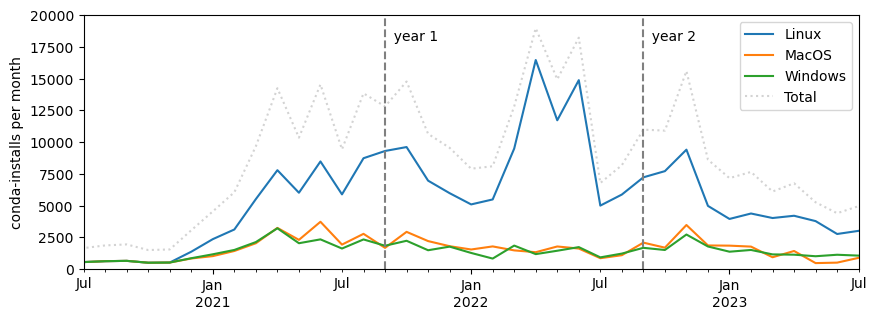

In [12]:
fig, ax = plt.subplots(figsize=(10, 3.3))

tmp = conda_df.unstack(level="pkg_platform")
tmp = tmp.set_index(pd.to_datetime(tmp.index.droplevel()))

tmp["Linux"] = tmp["linux-64"] + tmp["linux-ppc64le"] + tmp["linux-aarch64"] + tmp[""] / 3
tmp["MacOS"] = tmp["osx-64"] + tmp["osx-arm64"] + tmp[""] / 3
tmp["Windows"] = tmp["win-64"] + tmp[""] / 3
tmp["Total"] = tmp["Linux"] + tmp["MacOS"] + tmp["Windows"]

tmp[["Linux", "MacOS", "Windows", "Total"]].plot(ax=ax);

ax.lines[3].set_color("lightgray");
ax.lines[3].set_linestyle(":");

ax.set_xlim("2020-07-01", "2023-07-01");
ax.set_xlabel("");

ax.set_ylim(0, 20000);
ax.set_ylabel("conda-installs per month");

ax.axvline("2021-09-01", color="gray", linestyle="--");
ax.axvline("2022-09-01", color="gray", linestyle="--");

ax.text("2021-09-01", 18000, "  year 1");
ax.text("2022-09-01", 18000, "  year 2");

ax.legend(title="");

fig.savefig("PLOTS/conda-installs.pdf");
fig.savefig("PLOTS/conda-installs.svg");

In [4]:
pip_df = pd.read_csv("/home/jpivarski/storage/data/physicists/pip-counts-2023-08-14-big.csv", parse_dates=["date"]).set_index("date")
pip_df.head()

,os,python_version,project,version,count
date,,,,,
2018-06-17,Linux,3.4,awkward,0.0,1
2018-07-06,Linux,2.7,awkward,0.0,1
2018-07-08,Linux,2.7,awkward,0.0,1
2018-08-08,Linux,3.4,awkward,0.0,1
2018-08-08,Linux,3.7,awkward,0.0,1


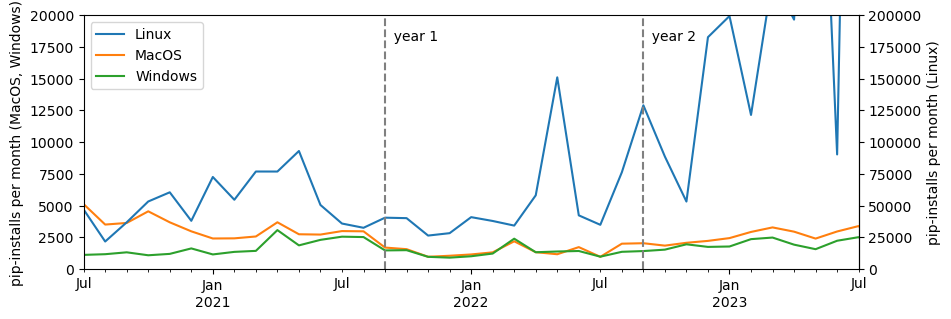

In [13]:
fig, ax = plt.subplots(figsize=(10, 3.3))

tmp = pip_df[pip_df["project"].isin(["awkward", "awkward0", "awkward1"])][["os", "count"]]

tmp_Linux = tmp["count"][tmp["os"] == "Linux"]
tmp_MacOS = tmp["count"][tmp["os"] == "Darwin"]
tmp_Windows = tmp["count"][tmp["os"] == "Windows"]

tmp2 = pd.DataFrame({
    "Linux": tmp_Linux.resample("M", origin="2021-07-01").sum(),
    "MacOS": tmp_MacOS.resample("M", origin="2021-07-01").sum(),
    "Windows": tmp_Windows.resample("M", origin="2021-07-01").sum(),
}).fillna(0)

tmp2.plot(ax=ax);

(tmp2["Linux"] / 10).plot(ax=ax, color=plt.rcParams["axes.prop_cycle"].by_key()["color"][0]);
y2 = ax.secondary_yaxis("right", functions=(lambda x: x*10, lambda x: x/10));
y2.set_ylabel("pip-installs per month (Linux)");

ax.set_ylim(0, 20000);

ax.set_xlim("2020-07-01", "2023-07-01");
ax.set_xlabel("");

ax.set_ylabel("pip-installs per month (MacOS, Windows)");

ax.axvline("2021-09-01", color="gray", linestyle="--");
ax.axvline("2022-09-01", color="gray", linestyle="--");

ax.text("2021-09-01", 18000, "  year 1");
ax.text("2022-09-01", 18000, "  year 2");

fig.savefig("PLOTS/pip-installs.pdf");
fig.savefig("PLOTS/pip-installs.svg");

In [6]:
df = pip_df

In [7]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

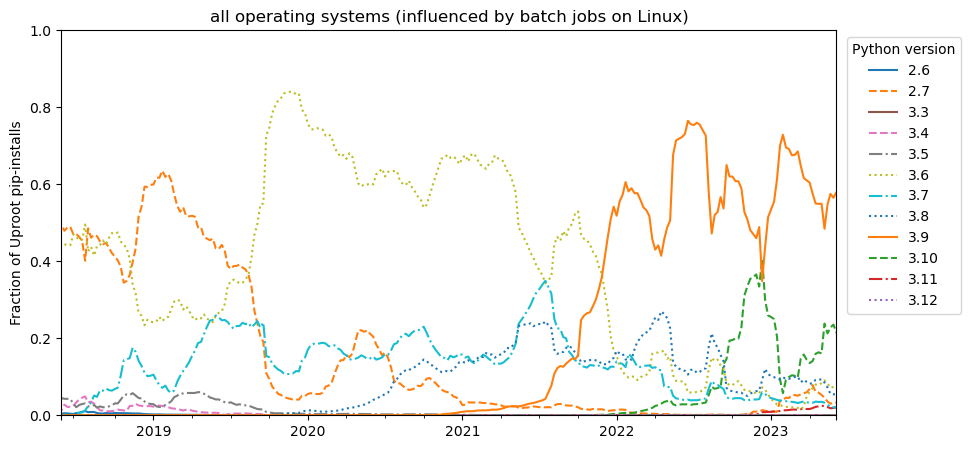

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

df2 = (
    df[df["project"].isin(["uproot", "uproot3", "uproot4"])][
        ["python_version", "count"]
    ]
    .groupby(["date", "python_version"])
    .sum()
    .unstack(level="python_version")
    .fillna(0)
    .resample("W")
    .sum()
    .rolling(12)
    .mean()
)

df2.div(df2.sum(axis=1), axis=0).plot(ax=ax, color=colors)

ax.set_yscale("linear")
ax.set_ylim(0, 1)

ax.set_xlabel("")
ax.set_ylabel("Fraction of Uproot pip-installs")
ax.set_xlim("2018-06-01", "2023-06-01")

ax.lines[0].set_linestyle("-")
ax.lines[1].set_linestyle("--")
ax.lines[9].set_linestyle("-.")
ax.lines[10].set_linestyle(":")
ax.lines[11].set_linestyle("-")
ax.lines[2].set_linestyle("--")
ax.lines[3].set_linestyle("-.")
ax.lines[4].set_linestyle(":")
ax.lines[5].set_linestyle("-")
ax.lines[6].set_linestyle("--")
ax.lines[7].set_linestyle("-.")
ax.lines[8].set_linestyle(":")

handles, labels = ax.get_legend_handles_labels()
handles = np.array(handles)[[0, 1, 5, 6, 7, 8, 9, 10, 11, 2, 3, 4]]
labels = [
    "2.6",
    "2.7",
    "3.3",
    "3.4",
    "3.5",
    "3.6",
    "3.7",
    "3.8",
    "3.9",
    "3.10",
    "3.11",
    "3.12",
]
ax.legend(handles, labels, title="Python version", bbox_to_anchor=(1.17, 1), loc="upper right");
ax.set_title("all operating systems (influenced by batch jobs on Linux)");

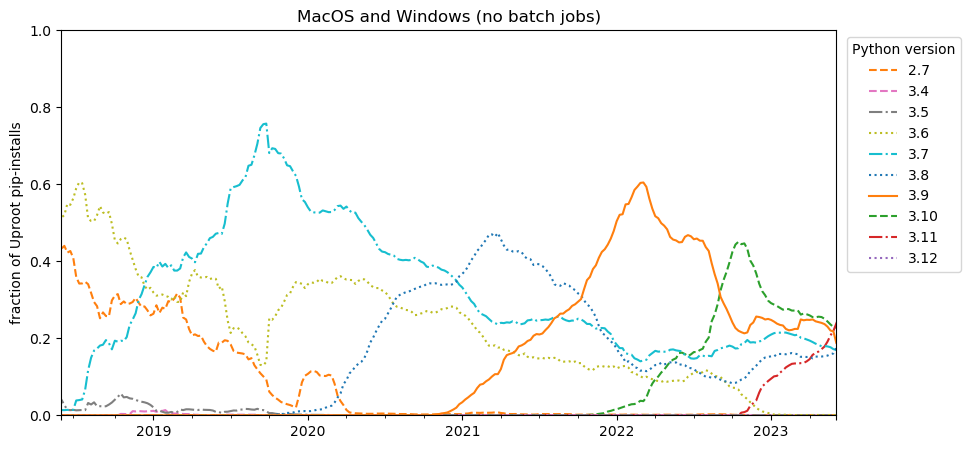

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

df2 = (
    df[df["os"].isin(["Darwin", "Windows"]) & df["project"].isin(["uproot", "uproot3", "uproot4"])][
        ["python_version", "count"]
    ]
    .groupby(["date", "python_version"])
    .sum()
    .unstack(level="python_version")
    .fillna(0)
    .resample("W")
    .sum()
    .rolling(12)
    .mean()
)

df2.div(df2.sum(axis=1), axis=0).plot(ax=ax, color=np.array(colors)[[1, 2, 3, 4, 6, 7, 8, 9, 0, 1]])

ax.set_yscale("linear")
ax.set_ylim(0, 1)

ax.set_xlabel("")
ax.set_ylabel("fraction of Uproot pip-installs")
ax.set_xlim("2018-06-01", "2023-06-01")

ax.lines[0].set_linestyle("--")
ax.lines[1].set_linestyle("--")
ax.lines[2].set_linestyle("-.")
ax.lines[3].set_linestyle(":")
ax.lines[4].set_linestyle("--")
ax.lines[5].set_linestyle("-.")
ax.lines[6].set_linestyle(":")
ax.lines[7].set_linestyle("-.")
ax.lines[8].set_linestyle(":")
ax.lines[9].set_linestyle("-")

handles, labels = ax.get_legend_handles_labels()
handles = np.array(handles)[[0, 4, 5, 6, 7, 8, 9, 1, 2, 3]]
labels = [
    "2.7",
    "3.4",
    "3.5",
    "3.6",
    "3.7",
    "3.8",
    "3.9",
    "3.10",
    "3.11",
    "3.12",
]
ax.legend(handles, labels, title="Python version", bbox_to_anchor=(1.17, 1), loc="upper right");
ax.set_title("MacOS and Windows (no batch jobs)");